# GROUP- 4

## IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np  #Matrix Multiplication
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from collections import Counter
from xgboost import XGBClassifier
import os
import sys
from sklearn.preprocessing import LabelEncoder

### DATA RETRIEVING

In [5]:
train = pd.read_csv(r"C:\Users\anirb\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\anirb\Desktop\test.csv")
target = pd.read_csv(r"C:\Users\anirb\Desktop\sample_submission.csv")

### DATA WRANGLING

In [6]:
test = target.merge(test,on='id')

In [7]:
total_data = pd.concat([train,test])

In [8]:
total_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37,1,< 1 Year,No,30867,152,56,0
127033,508143,Female,38,1,28,0,1-2 Year,Yes,28700,122,165,0
127034,508144,Male,21,1,46,1,< 1 Year,No,29802,152,74,0
127035,508145,Male,71,1,28,1,1-2 Year,No,62875,26,265,0


In [9]:
total_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [10]:
target.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [11]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [12]:
print("Train data")
print(train.info())
print(train.isnull().sum())
print("------------x----------------x--------------x-----------------")
print("Test data")
print(test.info())
print(test.isnull().sum())

Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB
None
id                      0
Gender                  0
Age                     0
Driving_License         0
Regi

In [13]:
#here in our dataset the features like Response, Previously_Insured and Driving_License are in numerical form.
#So for better understanding in visualization we are converting these here in object data type
total_data1 = total_data.copy()
cols = ['Driving_License','Previously_Insured', 'Response']
for col in cols:
    total_data1[col] = total_data1[col].map({0:'No',1:'Yes'})

In [14]:
#now here we can see our columns are converted into text form object data type
total_data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,Yes,28,No,> 2 Years,Yes,40454,26,217,Yes
1,2,Male,76,Yes,3,No,1-2 Year,No,33536,26,183,No
2,3,Male,47,Yes,28,No,> 2 Years,Yes,38294,26,27,Yes
3,4,Male,21,Yes,11,Yes,< 1 Year,No,28619,152,203,No
4,5,Female,29,Yes,41,Yes,< 1 Year,No,27496,152,39,No


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Age'>

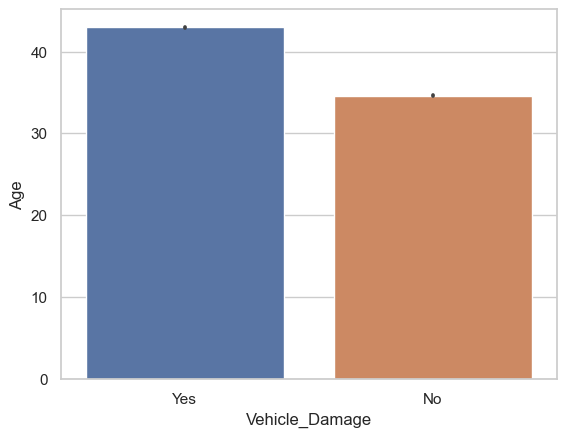

In [15]:
#The mean age of cutomers who got his/her vehicle damaged in the past is higher and around mid 40s
#as compared to who didn't had their vehicles damaged with mean age around early 30s
sns.barplot('Vehicle_Damage','Age',data=total_data)

<AxesSubplot:xlabel='Response', ylabel='count'>

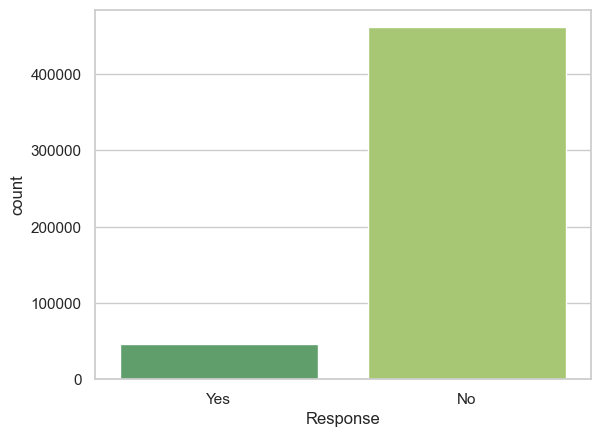

In [16]:
# now from total_data1 data we have made graph of our target variable "Response"
sns.countplot(total_data1['Response'],palette = 'summer')

<AxesSubplot:xlabel='Gender', ylabel='count'>

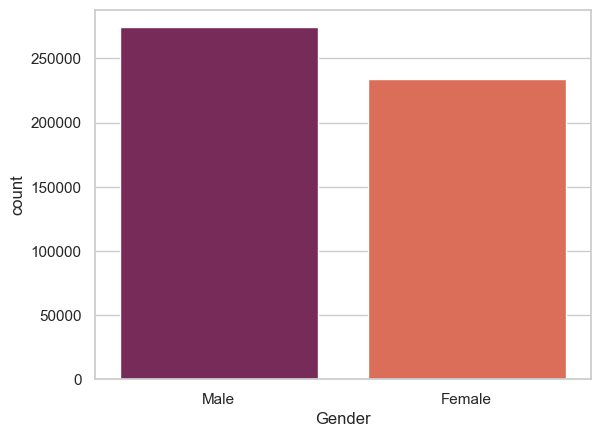

In [17]:
#now have a look at gender column to see either male customers are more interested in insurence or female customers
sns.countplot(total_data['Gender'], palette = 'rocket')

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

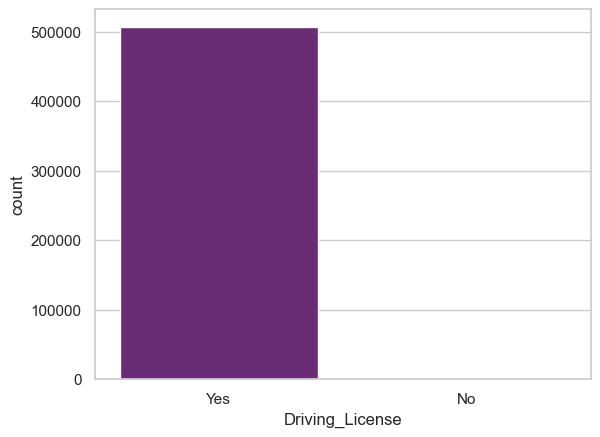

In [18]:
#visualization for customers who have driving license
sns.countplot(total_data1['Driving_License'],palette = 'magma')

In [19]:
total_data1.isnull().values.any()

False

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

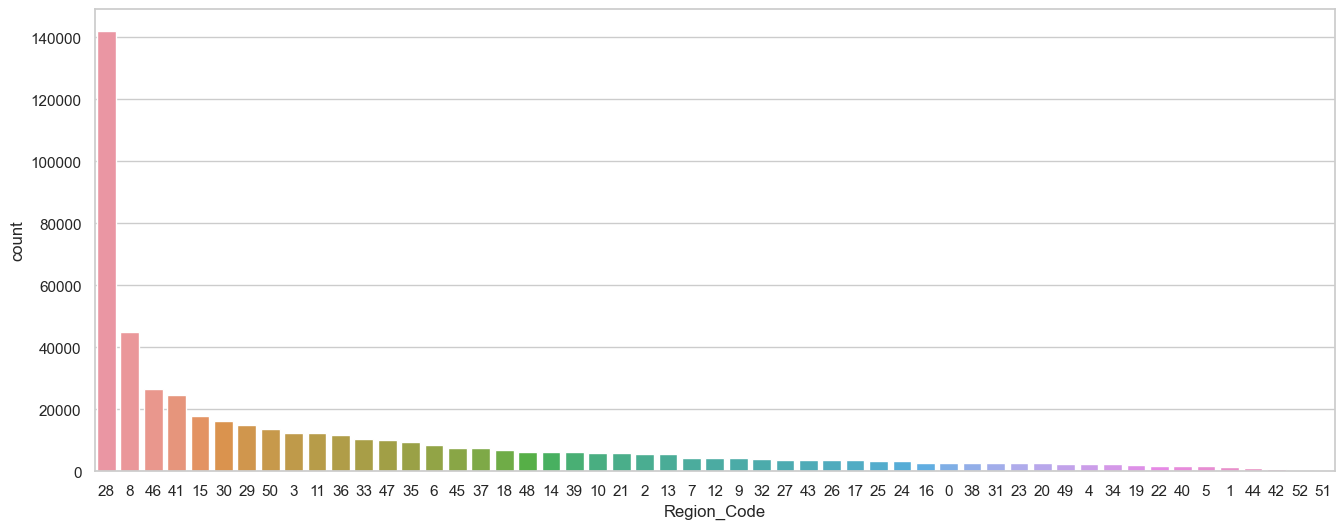

In [20]:
# now check according to region code
plt.figure(figsize=(16,6))
sns.countplot(x = "Region_Code", data = total_data, order = total_data1['Region_Code'].value_counts().index)

<AxesSubplot:ylabel='Region_Code'>

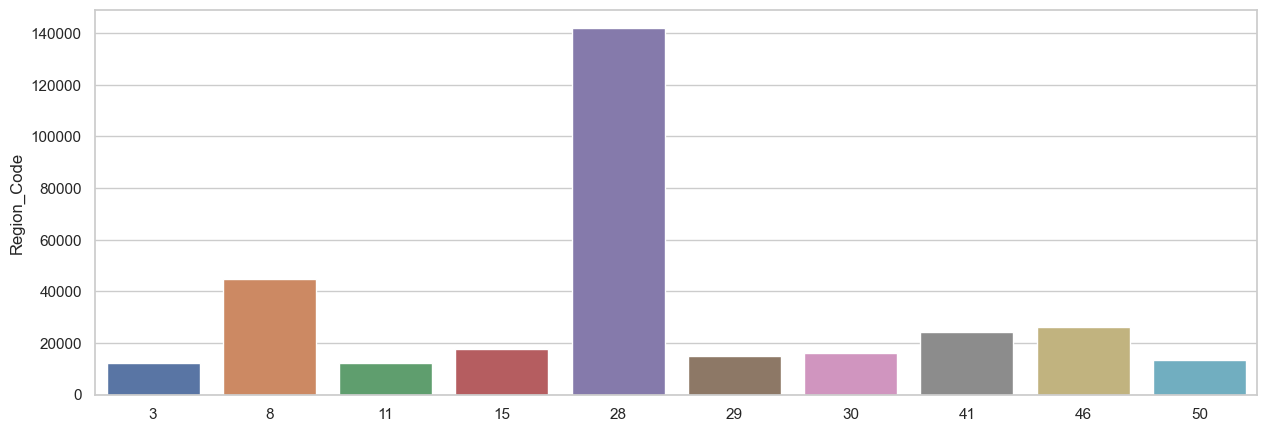

In [21]:
# top 10 regions with highest number of insurers
region = total_data['Region_Code'].value_counts()[:10].keys()
values = total_data['Region_Code'].value_counts()[:10]
plt.figure(figsize = (15,5))
sns.barplot(x=region, y=values)

In [22]:
#seperate dataframe of previously insured customers
temp3 = pd.DataFrame(total_data[total_data['Previously_Insured']==1].groupby('Gender')['Previously_Insured'].count())
temp3['Insured']=temp3['Previously_Insured']
temp3.drop('Previously_Insured',axis=1,inplace=True)
temp4=pd.DataFrame(total_data[total_data['Previously_Insured']==0].groupby('Gender')['Previously_Insured'].count())
temp4['Not Insured']=temp4['Previously_Insured']
temp4.drop('Previously_Insured',axis=1,inplace=True)
prev_insured = temp3.merge(temp4,right_index=True,left_index=True)

<AxesSubplot:xlabel='Gender'>

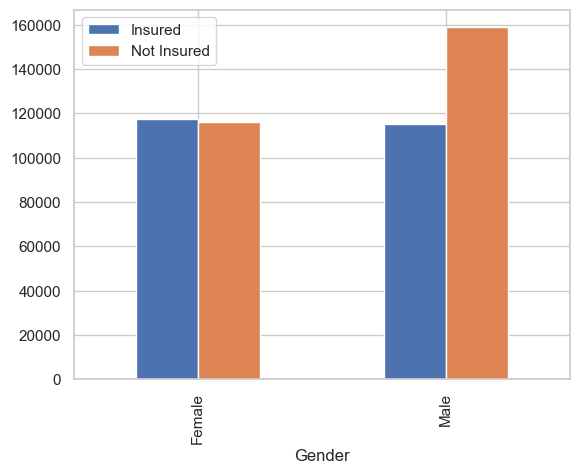

In [23]:
prev_insured.plot(kind="bar")

In [24]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [25]:
#Seperate data frame of gender and driving license
temp1 = pd.DataFrame(total_data[total_data['Driving_License']==1].groupby('Gender')['Driving_License'].count())

In [26]:
#seperate dataframe of gender who have driving license
temp1['have_license']=temp1['Driving_License']
temp1.drop('Driving_License',axis=1,inplace=True)

In [27]:
#seperate dataframe of gender who do not have driving license
temp2=pd.DataFrame(total_data[total_data['Driving_License']==0].groupby('Gender')['Driving_License'].count())
temp2['not_have_license']=temp2['Driving_License']
temp2.drop('Driving_License',axis=1,inplace=True)

In [28]:
#combine both dataframe of gender who have license and have not
licence_info=temp1.merge(temp2,right_index=True,left_index=True)

<AxesSubplot:xlabel='Gender'>

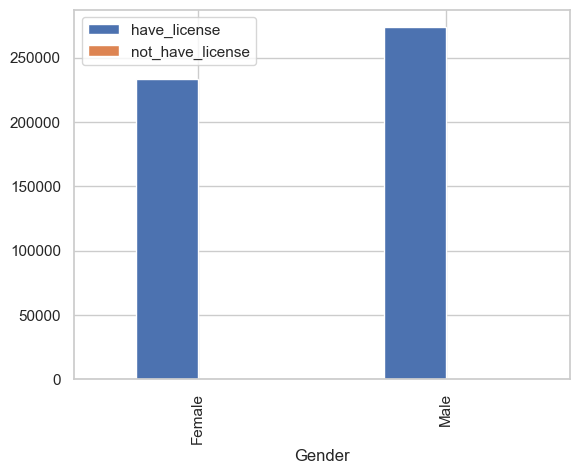

In [29]:
licence_info.plot(kind="bar")

In [30]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [31]:
# converting vehicle age colums values into numeric form of total_data
total_data['Vehicle_Age']=total_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [32]:
total_data.Vehicle_Age.unique()

array([2, 1, 0], dtype=int64)

<AxesSubplot:>

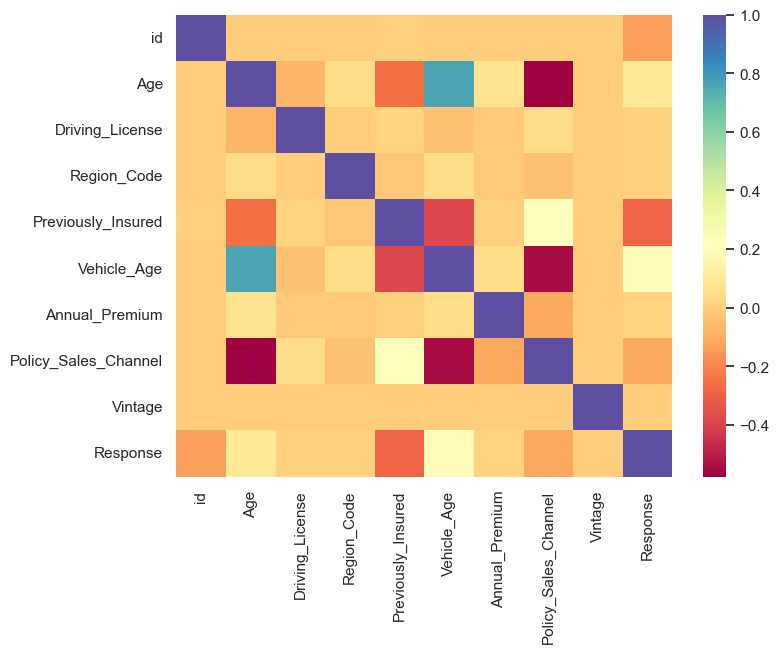

In [33]:
# corelation matrix
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(total_data.corr(), cmap = 'Spectral')

In [34]:
total_data.Region_Code.unique()

array([28,  3, 11, 41, 33,  6, 35, 50, 15, 45,  8, 36, 30, 26, 16, 47, 48,
       19, 39, 23, 37,  5, 17,  2,  7, 29, 46, 27, 25, 13, 18, 20, 49, 22,
       44,  0,  9, 31, 12, 34, 21, 10, 14, 38, 24, 40, 43, 32,  4, 51, 42,
        1, 52], dtype=int64)

In [35]:
total_data["Region_Code"].value_counts()

28    141937
8      44900
46     26357
41     24400
15     17750
30     16276
29     14843
50     13657
3      12349
11     12328
36     11696
33     10307
47      9942
35      9309
6       8351
45      7543
37      7343
18      6903
48      6274
14      6249
39      6138
10      5847
21      5671
2       5398
13      5396
7       4313
12      4235
9       4084
32      3745
27      3711
43      3508
26      3461
17      3455
25      3352
24      3263
16      2727
0       2699
38      2677
31      2635
23      2596
20      2528
49      2388
4       2379
34      2190
19      2059
22      1729
40      1708
5       1698
1       1363
44      1064
42       787
52       357
51       271
Name: Region_Code, dtype: int64

In [36]:
total_data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,Yes,28,No,> 2 Years,Yes,40454,26,217,Yes
1,2,Male,76,Yes,3,No,1-2 Year,No,33536,26,183,No
2,3,Male,47,Yes,28,No,> 2 Years,Yes,38294,26,27,Yes
3,4,Male,21,Yes,11,Yes,< 1 Year,No,28619,152,203,No
4,5,Female,29,Yes,41,Yes,< 1 Year,No,27496,152,39,No


In [37]:
encoder= LabelEncoder()
total_data["Gender"]=encoder.fit_transform(total_data["Gender"])
total_data["Vehicle_Age"]=encoder.fit_transform(total_data["Vehicle_Age"])
total_data["Vehicle_Damage"]=encoder.fit_transform(total_data["Vehicle_Damage"])

In [38]:
total_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


In [39]:
df=total_data

In [40]:
y = df['Response']
x = df.drop('Response',axis=1)
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [48]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model= lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print ("Confussion Matrix")
print (lr_conf_matrix)
print ("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print (classification_report(y_test,lr_predict))

Confussion Matrix
[[92169   120]
 [ 9246    95]]


Accuracy of Logistic Regression: 90.78421725868347 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     92289
           1       0.44      0.01      0.02      9341

    accuracy                           0.91    101630
   macro avg       0.68      0.50      0.49    101630
weighted avg       0.87      0.91      0.87    101630



In [47]:
m2 = 'Naive Bayes'
nb = GaussianNB()
model=nb.fit(x_train,y_train)
nb_predict = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test,nb_predict)
nb_acc_score = accuracy_score(y_test,nb_predict)
print ("Confussion Matrix")
print (nb_conf_matrix)
print ("\n")
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print (classification_report(y_test,nb_predict))

Confussion Matrix
[[57060 35229]
 [  329  9012]]


Accuracy of Naive Bayes: 65.01229951785889 

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     92289
           1       0.20      0.96      0.34      9341

    accuracy                           0.65    101630
   macro avg       0.60      0.79      0.55    101630
weighted avg       0.92      0.65      0.72    101630



In [49]:
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=10,random_state=2,max_depth=5)
model=rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_acc_score = accuracy_score(y_test,rf_predict)
print ("Confussion Matrix")
print (rf_conf_matrix)
print ("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')
print (classification_report(y_test,rf_predict))

Confussion Matrix
[[92289     0]
 [ 9341     0]]


Accuracy of Random Forest Classifier: 90.80881629440127 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     92289
           1       0.00      0.00      0.00      9341

    accuracy                           0.91    101630
   macro avg       0.45      0.50      0.48    101630
weighted avg       0.82      0.91      0.86    101630



In [50]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=6)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predict)
dt_acc_score = accuracy_score(y_test,dt_predict)
print ("Confussion Matrix")
print (dt_conf_matrix)
print ("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')
print (classification_report(y_test,dt_predict))

Confussion Matrix
[[92289     0]
 [ 9341     0]]


Accuracy of Decision Tree Classifier: 90.80881629440127 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     92289
           1       0.00      0.00      0.00      9341

    accuracy                           0.91    101630
   macro avg       0.45      0.50      0.48    101630
weighted avg       0.82      0.91      0.86    101630

